In [1]:
from likelihood.regression_models import arima, fourier_regression
from likelihood.tools import generate_series, scale, rescale
from likelihood import walkers
import numpy as np
import matplotlib.pyplot as plt 

plt.rcParams['font.size'] = 12
plt.style.use('bmh')

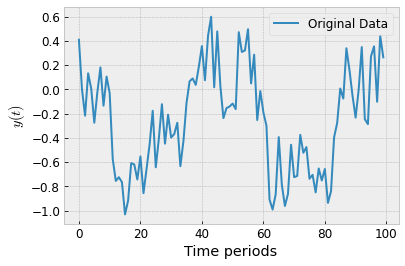

In [2]:
# We generate a time series with 25 points and with slope
a = generate_series(2, 100, incline=True)
y_serie = np.copy(a)

# Graph the data for visualization
plt.plot(range(len(y_serie[0, :])), y_serie[0, :], label = 'Original Data')
plt.legend()
plt.xlabel('Time periods')
plt.ylabel('$y(t)$')
plt.show()

Accuracy: 0.4497
RMSE: 0.9487


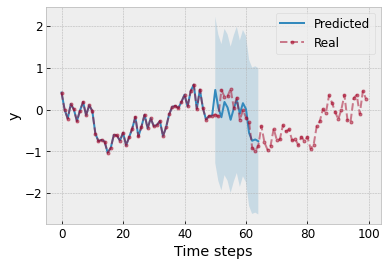

In [3]:
# Standardize the data and subtract the slope
y_scale, values = rescale(a)
y_train = y_scale[0, :50]
y_val = y_scale[0, 50:]
# We define the regression model
model = arima(y_train)
model.train(nwalkers = 15, noise = 0)
model.save_model('model')
model.load_model('model')
# We predict 15 points forward
y_pred = model.predict(15)
model.eval(y_val[:15], y_pred[-15])
y_pred = y_pred[..., np.newaxis]
y_pred = y_pred.reshape(-1, y_pred.shape[0])
y_pred = scale(y_pred, values)
model.plot_pred(y_serie[0, :], y_pred[0, :])

The 1-th row of the dataset has been denoised.
The period is 50.0
The 2-th row of the dataset has been denoised.
The period is 25.0


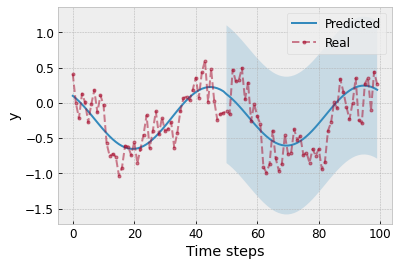

In [4]:
second_model = fourier_regression(y_scale[:, :50])
second_model.fit(sigma = 1, mov = 1000, mode = True)
y_pred_second = second_model.predict(50, n_walkers = 15, name = 'fourier_model', save = True)
y_pred = scale(y_pred_second, values)
second_model.plot_pred(y_serie[0, :], y_pred[0, :])
second_model = fourier_regression(y_scale[:, :50], 50)
y_pred = scale(second_model.load_predict('fourier_model'), values)

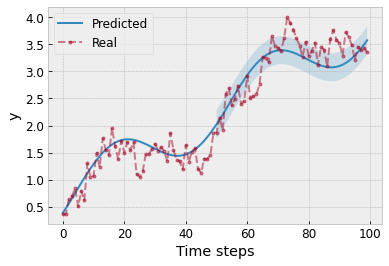

In [5]:
second_model.plot_pred(y_serie[1, :], y_pred[1, :])